# Some Calculations with Confidence Intervals 

Previous calculations showed that Age was the variable with highest standard deviation in the sample. The Central Limit Theorem offers a way to find the average Age with high reliability. 

In [1]:
# Import useful packages for the calculation of confidence intervvals
import pandas
import numpy as np
from scipy import stats
# Do not import tabulate from tabulate
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# import data
filename = '../Data/train.csv'
titanic_dataframe = pandas.read_csv(filename)
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
sample_size_n, num_variables = titanic_dataframe.shape 
print('Number of rows and columns:', titanic_dataframe.shape)

Number of rows and columns: (891, 12)


# Distribution of variable Age in Sample 

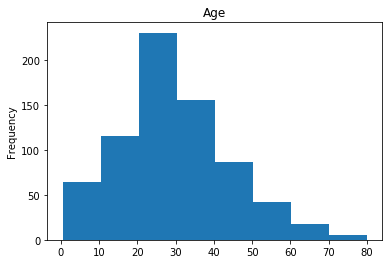

In [3]:
# Choose category to examine:
category = 'Age'

def histogramplot(column_name):
    #plots a histogram and prints the frequency
    plt.figure()
    titanic_dataframe[column_name].plot.hist(bins = 8, figsize = (6,4))
    plt.title(column_name)
    #headers = [column_name,'Frequency']
    #print(headers)
    #print(stats.itemfreq(titanic_dataframe[column_name]))
    
histogramplot(category)

In [4]:
#titanic_dataframe['Age']
#https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python
# left/lower-tail probabilities by default
#stats.norm.ppf(0.95)
#stats.norm.cdf(1.96)
# Z score corresponding to area included in between
#stats.norm.ppf(1-(1-0.95)/2) #right side
#stats.norm.ppf((1-0.95)/2)


# Confidence Intervals

In [5]:
def confidence_interval(sample,confidence_level,to_print):
    mean = np.mean(sample) # stats.mean(sample) is deprecated # Sample Mean - Point Estimate
    z = stats.norm.ppf(1-(1-confidence_level)/2)
    #SE = np.std(sample) # Standard Error of the Sampling Distribution of the Sample Mean... SHOULD BE... But we don't have the standard deviation of the population...
    # So we must use the standard deviation of the sample we have... as a best guess...
    # Wait, let's say it's representative of the population. You must divide by 
    SE = np.std(sample) / (len(sample)**(1/2))
    lowbound = mean - z*SE
    highbound = mean + z*SE
    
    if to_print:
        print('Point Estimate', mean)
        print('Confidence Interval', lowbound,highbound)
    return lowbound,highbound

confidence_interval(titanic_dataframe['Age'],0.95,True)

Point Estimate 29.69911764705882
Confidence Interval 28.7459576512 30.6522776429


(28.745957651178049, 30.652277642939591)

# Estimate of mean Age in Titanic

In [31]:
confidence_interval(titanic_dataframe['Age'],0.95,True)

Point Estimate 29.69911764705882
Confidence Interval 28.7459576512 30.6522776429


(28.745957651178049, 30.652277642939591)

# Confidence intervals with proportions 
## (I think for now you don't want this)

In [16]:
# Code for determining a 95% confidence interval
def confidence_interval_proportions(sample_size_n,sample_proportion_p,confidence_level): # sample_size_n and proportion_p
    point_estimate = sample_proportion_p # Since we are dealing with proportions
    z = stats.norm.ppf(1-(1-confidence_level)/2) #stats.norm.ppf(0.95)confidence_level
    SE = (sample_proportion_p * (1-sample_proportion_p)/sample_size_n)
    
    lowbound = point_estimate - z*SE
    highbound = point_estimate + z*SE
    
    print(str(confidence_level*100)+"% confidence interval:", [lowbound,highbound])
    
    return [lowbound,highbound]

n = sample_size_n
# proportion of people who...
children_who_not_survived = len(titanic_dataframe.loc[titanic_dataframe[]])
p = 200 / sample_size_n
print('Point estimate', p)
print(confidence_interval_proportions(n,p,.95))

Point estimate 0.2244668911335578
95.0% confidence interval: [0.22408395793268851, 0.2248498243344271]
[0.22408395793268851, 0.2248498243344271]


In [17]:
#type(titanic_dataframe['Age'])

# Proportion of children who did not survived (Age < 12)

## Sample of children (Survived and not Survived)

In [24]:
titanic_dataframe.loc[titanic_dataframe['Age'] < 12]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


## Proportion

In [28]:
total_children = len(titanic_dataframe.loc[(titanic_dataframe['Age'] < 12)])
children_who_not_survived = len(titanic_dataframe.loc[(titanic_dataframe['Survived'] == 0) & (titanic_dataframe['Age'] < 12)])
children_who_not_survived_proportion = children_who_not_survived / total_children
print(total_children)
print(children_who_not_survived)
print(children_who_not_survived_proportion)

68
29
0.4264705882352941


## Confidence Interval for proportion of children who did not survive

In [30]:
print(confidence_interval_proportions(total_children,children_who_not_survived_proportion,.95))

95.0% confidence interval: [0.41942067198467459, 0.43352050448591362]
[0.41942067198467459, 0.43352050448591362]
